In [115]:
import pandas as pd
from typing import List
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
genetic_df = pd.read_csv('results/genetic_algorithm_output.csv', delimiter=';')
heuristics_df = pd.read_csv('results/heuristics_output.csv', delimiter=';')

In [117]:
df = pd.concat([genetic_df, heuristics_df], axis=0)
df.drop(columns=['POP_SIZE', 'GENERATIONS', 'MUTATION_RATE', 'TOURNAMENT_SIZE'], inplace=True)

In [118]:
DATASETS_NAME: List[str] = ['Falkenauer U', 'Falkenauer_T', 'Scholl_1', 'Scholl_2', 'Wäscher']
df['DATASET_KEY'] = np.nan
for dataset in DATASETS_NAME:
    mask = df['DATASET_NAME'].str.contains(dataset, na=False)
    df.loc[mask, 'DATASET_KEY'] = dataset

C:\Users\kakrpl\AppData\Local\Temp\ipykernel_22912\1682157013.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Falkenauer U' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[mask, 'DATASET_KEY'] = dataset


In [119]:
df

,DATASET_NAME,METHOD_NAME,BIN_NUMBER,BIN_CAPACITY,N,ELAPSED_TIME_MS,DATASET_KEY
0,Scholl_2_N3W4B1R9.txt,Genetic_Algorithm,62,1000,200,16764.4400,Scholl_2
1,Scholl_2_N4W3B1R9.txt,Genetic_Algorithm,170,1000,500,46723.3100,Scholl_2
2,Scholl_2_N4W1B1R3.txt,Genetic_Algorithm,243,1000,500,48974.1800,Scholl_2
3,Scholl_2_N4W3B2R1.txt,Genetic_Algorithm,168,1000,500,45335.9200,Scholl_2
4,Scholl_2_N4W3B1R1.txt,Genetic_Algorithm,170,1000,500,46006.5300,Scholl_2
...,...,...,...,...,...,...,...
4126,Falkenauer U_Falkenauer_u500_18.txt,First_fit,205,150,500,3.8158,Falkenauer U
4127,Falkenauer U_Falkenauer_u500_18.txt,Best_fit,205,150,500,4.5111,Falkenauer U
4128,Falkenauer U_Falkenauer_u500_19.txt,Next_fit,275,150,500,0.0696,Falkenauer U
4129,Falkenauer U_Falkenauer_u500_19.txt,First_fit,199,150,500,2.2883,Falkenauer U


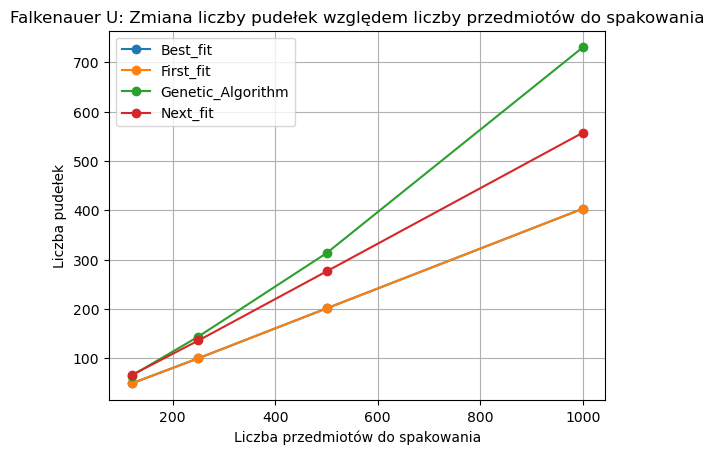

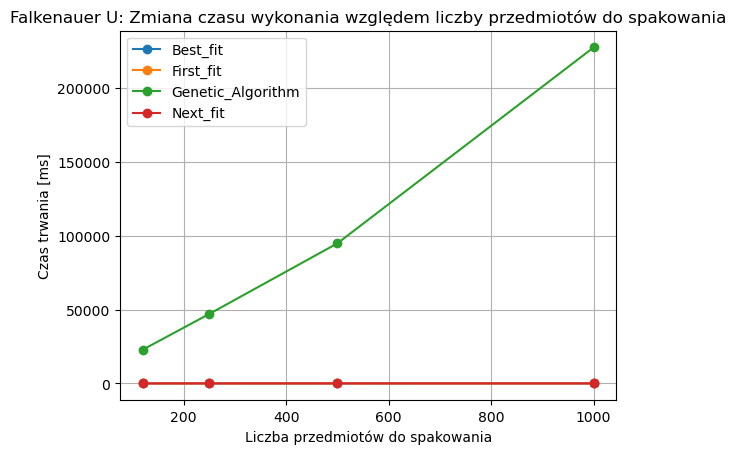

In [125]:
# Przygotowanie danych zgodnie z poprzednimi krokami  #fixme poprawić
grouped_df = df[df['DATASET_KEY'] == 'Falkenauer U']
grouped_df = grouped_df.groupby(['DATASET_KEY', 'METHOD_NAME', 'N'])
result = grouped_df.first().reset_index()

# Wykres 1: BIN_NUMBER vs N
for method in result['METHOD_NAME'].unique():
    subset = result[result['METHOD_NAME'] == method]
    plt.plot(subset['N'], subset['BIN_NUMBER'], marker='o', label=method)
plt.ylabel('Liczba pudełek')
plt.xlabel('Liczba przedmiotów do spakowania')
plt.title('Falkenauer U: Zmiana liczby pudełek względem liczby przedmiotów do spakowania')
plt.legend()
plt.grid(True)
plt.show()

# Wykres 2: ELAPSED_TIME_MS vs N
for method in result['METHOD_NAME'].unique():
    subset = result[result['METHOD_NAME'] == method]
    plt.plot(subset['N'], subset['ELAPSED_TIME_MS'], marker='o', label=method)
plt.ylabel('Czas trwania [ms]')
plt.xlabel('Liczba przedmiotów do spakowania')
plt.title('Falkenauer U: Zmiana czasu wykonania względem liczby przedmiotów do spakowania')
plt.legend()
plt.grid(True)
plt.show()


### Scholl 1 - analysis

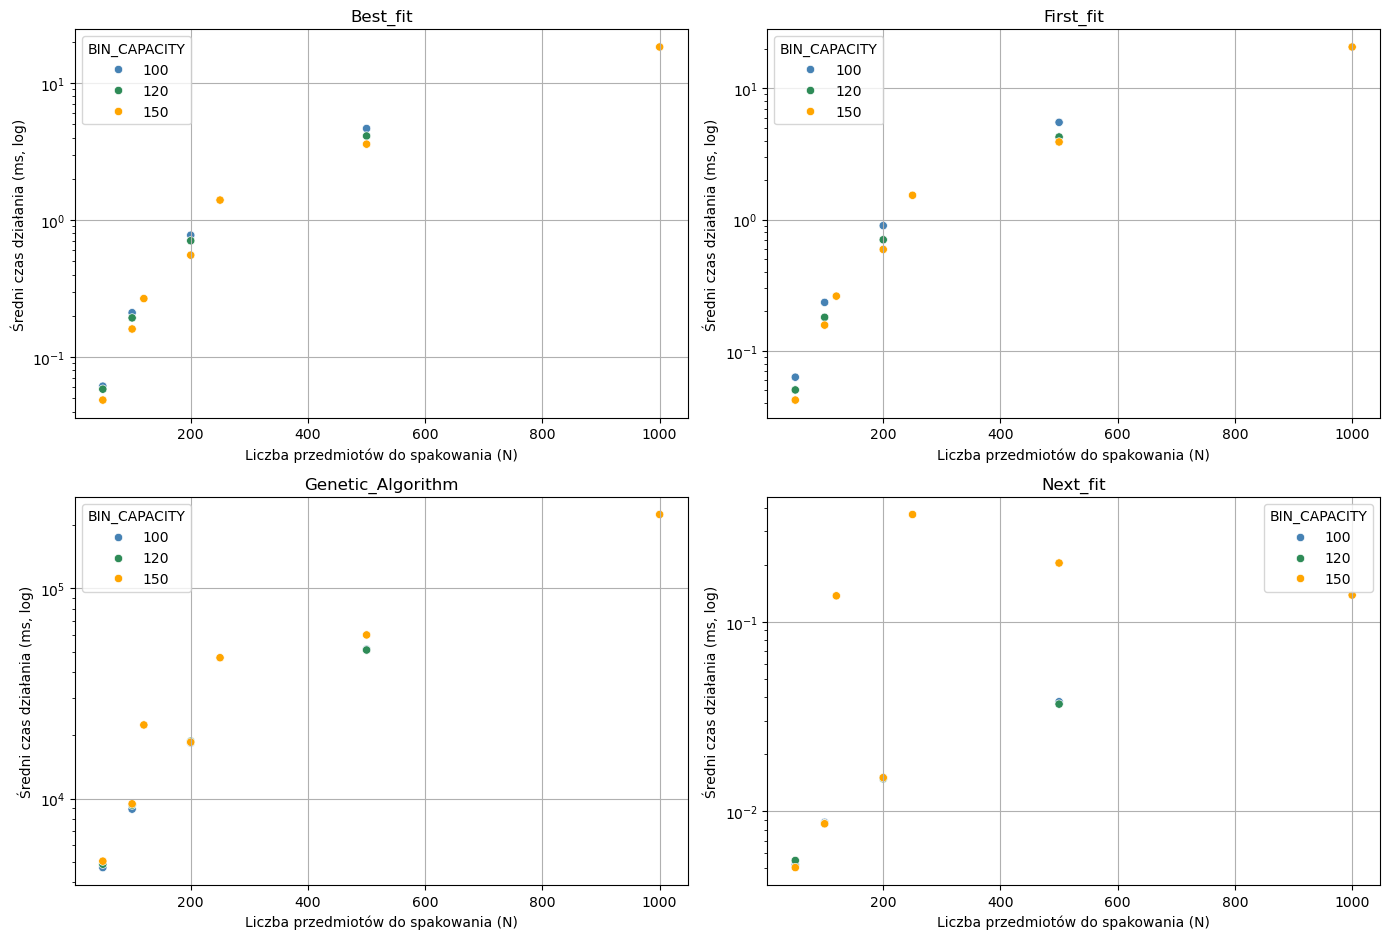

In [ ]:
filtered = df[df["BIN_CAPACITY"].isin([100, 120, 150])]
pivot_table = filtered.groupby(["METHOD_NAME", "BIN_CAPACITY", "N"]).agg({
    "BIN_NUMBER": "mean",
    "ELAPSED_TIME_MS": "mean"
}).reset_index()

palette = {
    100: "steelblue",
    120: "seagreen",
    150: "orange"
}

methods = pivot_table["METHOD_NAME"].unique()
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, method in enumerate(methods):
    subset = pivot_table[pivot_table["METHOD_NAME"] == method]
    sns.scatterplot(
        data=subset,
        x="N",
        y="ELAPSED_TIME_MS",
        hue="BIN_CAPACITY",
        palette=palette,
        ax=axes[i],
        marker="o"
    )
    axes[i].set_yscale("log")
    axes[i].set_title(f"{method}")
    axes[i].set_xlabel("Liczba przedmiotów do spakowania (N)")
    axes[i].set_ylabel("Średni czas działania (ms, log)")
    axes[i].grid(True)

handles, labels = axes[0].get_legend_handles_labels()
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


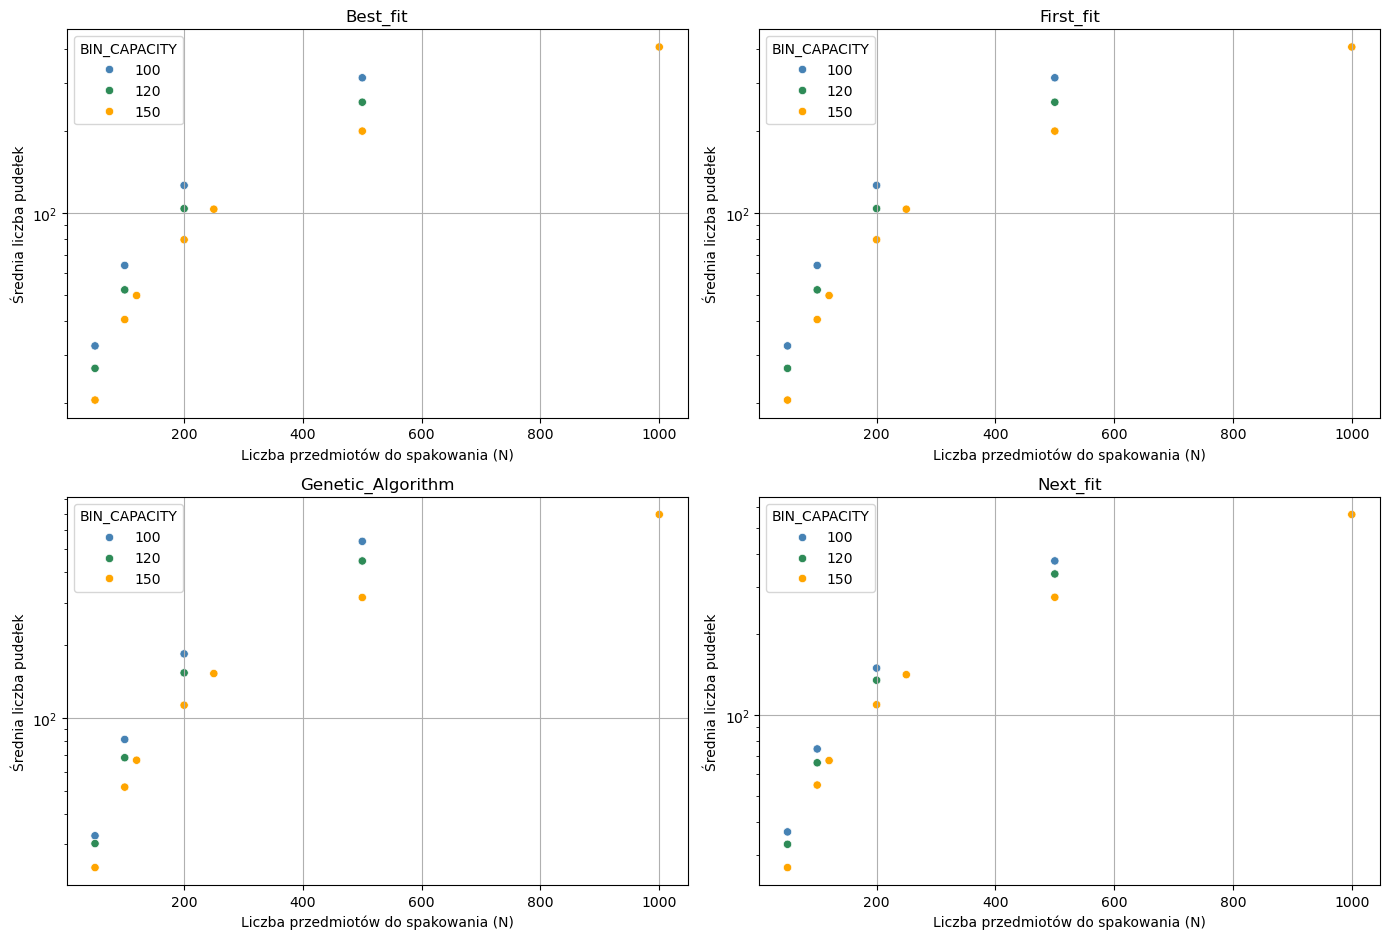

In [ ]:

methods = pivot_table["METHOD_NAME"].unique()
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, method in enumerate(methods):
    subset = pivot_table[pivot_table["METHOD_NAME"] == method]
    sns.scatterplot(
        data=subset,
        x="N",
        y="BIN_NUMBER",
        hue="BIN_CAPACITY",
        palette=palette,
        ax=axes[i],
        marker="o"
    )
    axes[i].set_title(f"{method}")
    axes[i].set_xlabel("Liczba przedmiotów do spakowania (N)")
    axes[i].set_ylabel("Średnia liczba pudełek")
    axes[i].grid(True)

handles, labels = axes[0].get_legend_handles_labels()
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
